In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report
from matplotlib import  pyplot as plt
import seaborn as sb


In [94]:
df=pd.read_csv("../assets/cleaned_data.csv")
df.sample(1)

,Unnamed: 0,Status,Experience,Skills,Certification,Degree
182,182,1,2,10,0,0.0


In [95]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [96]:

x_train, x_test, y_train, y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=42)


**LogisticRegression**

In [97]:
lr=LogisticRegression(class_weight="balanced" ,random_state=42)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

accuracy: 0.91


In [98]:
cross_val_score(lr,x_train,y_train,cv=5)

array([0.9125, 0.9   , 0.8875, 0.8875, 0.9   ])

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         8
           1       1.00      0.90      0.95        92

    accuracy                           0.91       100
   macro avg       0.74      0.95      0.79       100
weighted avg       0.96      0.91      0.92       100



**Decision Tree**

In [100]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [101]:
dtc=DecisionTreeClassifier(random_state=42,max_depth=4)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

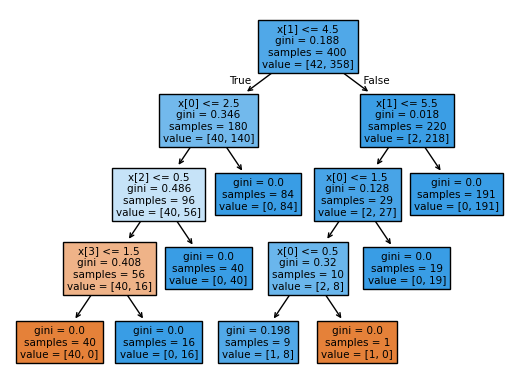

In [102]:
plot_tree(dtc,filled=True)
plt.show()

In [103]:
y_pred=dtc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(cross_val_score(dtc,x_train,y_train,cv=5))
print(classification_report(y_test,y_pred))

0.98
[1.     1.     0.9875 1.     0.975 ]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.98      1.00      0.99        92

    accuracy                           0.98       100
   macro avg       0.99      0.88      0.92       100
weighted avg       0.98      0.98      0.98       100



**Random Forest**

In [104]:
from sklearn.ensemble import  RandomForestClassifier

In [105]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [108]:
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0
